In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [85]:
!kaggle datasets download -d username/dogvscat

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/dogvscat.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    BatchNormalization,
    Dropout,
)

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogvscat/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    verbose=True,
)

Found 500 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogvscat/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    verbose=True,
)

Found 50 files belonging to 2 classes.


In [7]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
def process_normalize(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label


train_ds = train_ds.map(process_normalize)
validation_ds = validation_ds.map(process_normalize)

In [ ]:
# cnn model

model = Sequential()
model.add(
    Conv2D(
        32,
        kernel_size=(3, 3),
        padding="valid",
        activation="relu",
        input_shape=(256, 256, 3),
    )
)
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 790ms/step - accuracy: 0.4858 - loss: 0.9613 - val_accuracy: 0.5000 - val_loss: 0.7004
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.5107 - loss: 0.6948 - val_accuracy: 0.5200 - val_loss: 0.6906
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.6043 - loss: 0.6859 - val_accuracy: 0.5000 - val_loss: 0.7307
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.6046 - loss: 0.6591 - val_accuracy: 0.5600 - val_loss: 0.6802
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.7039 - loss: 0.5669 - val_accuracy: 0.6000 - val_loss: 0.7011
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 475ms/step - accuracy: 0.7994 - loss: 0.4050 - val_accuracy: 0.5800 - val_loss: 0.7471
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 403ms/step - accuracy: 0.8945 - loss: 0.2756 - val_accuracy: 0.6000 - val_loss: 0.8979
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 518ms/step - accuracy: 0.9637 - loss: 0.1323 - val_accuracy: 

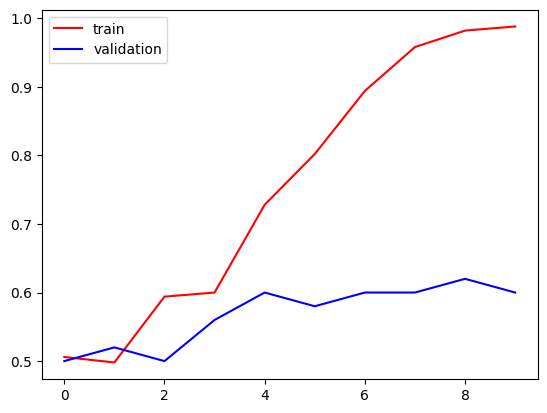

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()

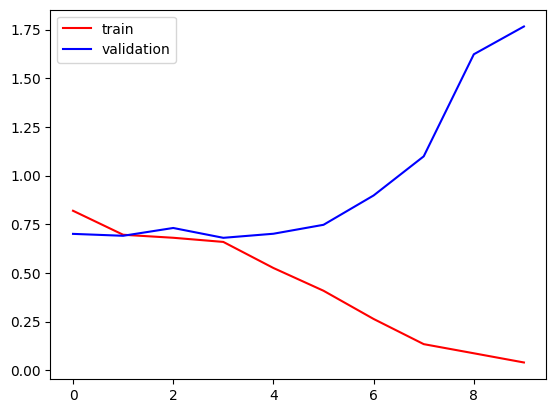

In [ ]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

In [ ]:
# reduce overfitting

model = Sequential()
model.add(
    Conv2D(
        32,
        kernel_size=(3, 3),
        padding="valid",
        activation="relu",
        input_shape=(256, 256, 3),
    )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 756ms/step - accuracy: 0.4836 - loss: 7.6859 - val_accuracy: 0.6000 - val_loss: 1.6219
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 484ms/step - accuracy: 0.6317 - loss: 6.0736 - val_accuracy: 0.6800 - val_loss: 1.2904
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 423ms/step - accuracy: 0.6478 - loss: 6.1877 - val_accuracy: 0.5400 - val_loss: 6.0025
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.7286 - loss: 3.0225 - val_accuracy: 0.5200 - val_loss: 5.9457
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.7155 - loss: 3.1580 - val_accuracy: 0.5200 - val_loss: 4.8623
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.7880 - loss: 2.4774 - val_accuracy: 0.4600 - val_loss: 3.8676
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 424ms/step - accuracy: 0.8316 - loss: 1.4659 - val_accuracy: 0.6000 - val_loss: 6.7583
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.8099 - loss: 1.7799 - val_accurac

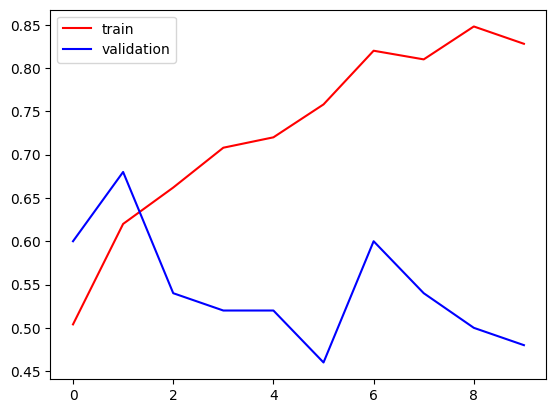

In [ ]:
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()

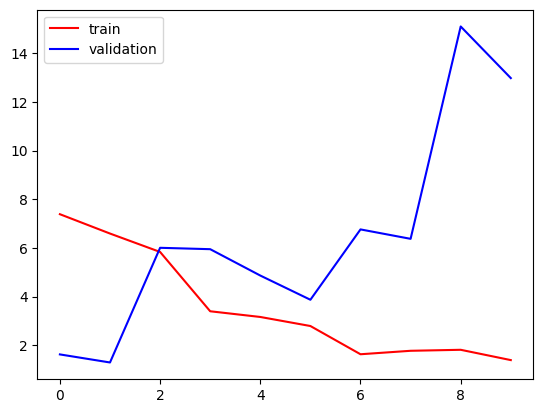

In [ ]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

In [22]:
import cv2

In [ ]:
test_img = cv2.imread("/content/Screenshot google cat.png")

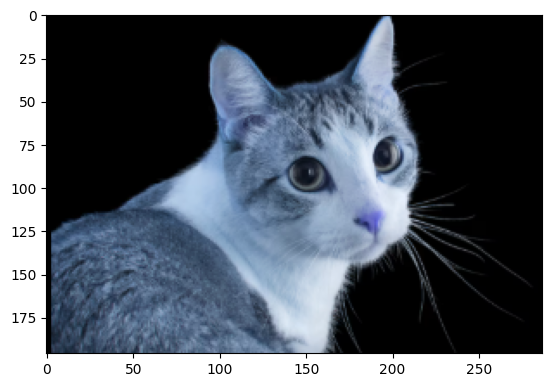

In [72]:
plt.imshow(test_img)

In [73]:
test_img.shape

(196, 287, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [76]:
test_input.shape

(1, 256, 256, 3)

In [77]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img = cv2.imread("/content/Screenshot google dog.png")

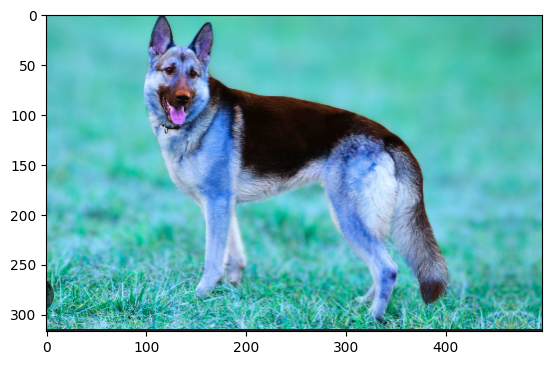

In [79]:
plt.imshow(test_img)

In [80]:
test_img.shape

(317, 497, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [83]:
test_input.shape

(1, 256, 256, 3)

In [84]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)